Visualize with a Gaussian density profile
===

In [133]:
# Importing usefull tools

from numpy import *
import matplotlib.pyplot as plt
import profile

In [134]:
# Usefull functions

# def gauss(x,sigma,mean = 0): return exp(-(x-mean)**2/(2*sigma**2))/(sqrt(2*pi)*sigma)
def volume(R): return 4/3 * pi * R**3
def mass(rho): return 4 * pi * sum(rho * r**2 * dr)
def sec_to_year(s): return s / 3600 / 24 / 365

def plot(mod,r,res,theo=None):
    _,ax1 = plt.subplots()
    l1 = ax1.plot(r,res,'bx',label="Code results")
    ax1.set_xlabel("r [cm]")
    ax1.set_label("Density [g.cm-3]")
    lns = l1

    if theo is not None:
        ax2 = ax1.twinx()
        l2 = ax2.plot(r,theo,'r',label="Analytic results")
        ax2.set_xlabel("r [cm]")

        if mod is not None:
            if mod.lower()=="density":
                ax2.set_label("Density [g.cm-3]")
            elif mod.lower()=="speed":
                ax2.set_label("Speed [cm.s-1]")
        lns = l1+l2

    # added these three lines
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)

    if mod is not None:
        if mod.lower()=="density":
            plt.title("Density profile")
        elif mod.lower()=="speed":
            plt.title("Speed profile")
        else:
            plt.title(mod)

    plt.grid()
    plt.show()

In [135]:
# Declaring constants

kb = 1.3806503e-16
Na = 6.022e23
mH = 1.67262178e-27
G = 6.67408e-8
Msun = 2e33
parsec_to_cm = 3.08567758e18
mu = 1.4
Temp = 10 # [K]
cs = sqrt(kb * Temp / (mu * mH))
rho_0 = Msun / volume(0.1/2*parsec_to_cm)
tff = sqrt(3*pi/(32 * G * rho_0))

In [136]:
# Getting all generated data

try:
    rho = loadtxt("results/rho.dat")
    v   = loadtxt("results/v.dat")
    t   = loadtxt("results/time.dat")
    r   = loadtxt("results/space.dat")
except:
    raise NameError("You must run the 'main_test.f90' program first. \n Please run :\n - gfortran .\Constants.f90 .\Prestel.f90 .\main_test.f90\n - ./a.exe")

In [137]:
N = size(r)
sigma = N/2
dt = tff / (N-1)
dr = (r[-1] - r[0]) / (N-1)
print("tff =", round(sec_to_year(tff),2),"years")

tff = 184743.17 years


---
# Visualize with a Gaussian density profile

## Evolution

### State at $t_0$

We will focus the study on a spherical space of radius $R$ containing a gaz of mass $Msun$ (1 sun mass) with a constant density distribution:

$$\rho_0(r) = \frac{Msun}{4/3*\pi R^3}$$

For the speed distribution, in a first time, we assume that, at $t_0$, all the gas is static.

$$v_0 = 0$$

Integration of density on the sphere (to get the mass in sun mass unit)
Excpected:    1.0151872400826445
Analytic:     1.0151872400826445
Code result:  1.0151872098277084


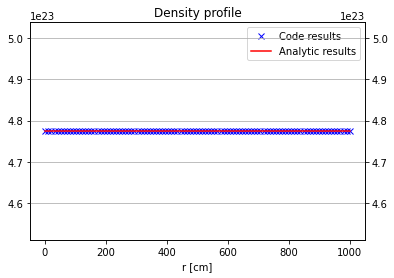

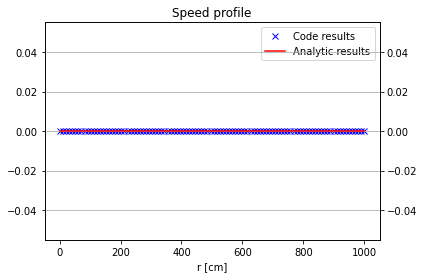

In [138]:
rho_theo = empty_like(rho)
P = Msun / volume(r[-1]) # Mean density

rho_theo[0,:] = 1#P                                

print("Integration of density on the sphere (to get the mass in sun mass unit)")
print("Excpected:   ", mass(P)/Msun)
print("Analytic:    ", mass(rho_theo[0])/Msun)
print("Code result: ", mass(rho[0])/Msun)

plot("density",r,rho[0],rho_theo[0])

v_theo = empty_like(v)
v_theo[0] = zeros(len(v_theo[0]))

plot("speed",r,v[0],v_theo[0])

### State at $t_1$

The evolution of the densities and the speeds are described by these relations:

$$\rho_{i+1} = \rho_i - \frac{1}{r^2}\bigg(\frac{\partial(r^2\rho v)}{\partial r}\bigg)_i dt + o(dt)$$
$$v_{i+1} = v_i + \bigg[-v_i\bigg(\frac{\partial v}{\partial r}\bigg)_i - \frac{c_s^2}{\rho_i}\bigg(\frac{\partial \rho}{\partial r}\bigg)_i - \int 4 \pi G \rho_i dr \bigg] dt + o(dt)$$

So we can deduce the expressions for the densities and the speeds at $t_1$:

$$\rho_{1} = \rho_0 - \frac{1}{r^2}\bigg(\frac{\partial(r^2\rho_0 v_0)}{\partial r}\bigg) dt$$
$$\rightarrow \rho_1 = \rho_0$$

$$v_{1} = v_0 + \bigg[-v_0\bigg(\frac{\partial v_0}{\partial r}\bigg) - \frac{c_s^2}{\rho_0}\bigg(\frac{\partial \rho_0}{\partial r}\bigg) - \int 4 \pi G \rho_0 dr \bigg] dt$$
$$\rightarrow v_1 = - 4 \rho_0 \pi G dt * r$$

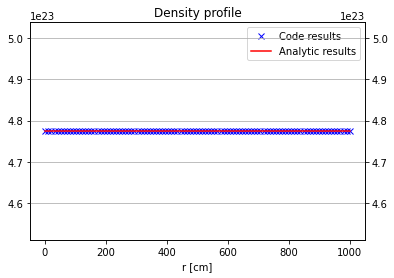

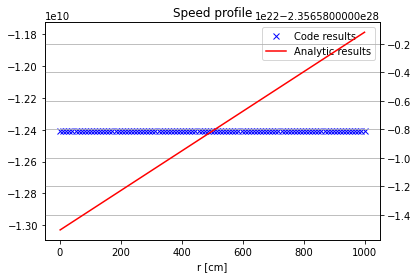

In [139]:
rho_theo[1] = rho_theo[0]
plot("density",r,rho[1],rho_theo[1])

v_theo[1] = - 4 * 1 * pi * G * dt * r
plot("speed",r,v[1],v_theo[1])

### State at $t_2$

$$\rho_2 = \rho_0 \Bigg(1 - dt^2 \bigg[cs^2 \bigg(3-\frac{r^2}{\sigma^2}\bigg) + 4 \pi G \bigg(\frac{r}{\sigma^2} - \frac{2}{r}\bigg)\bigg] \Bigg)$$
$$v_2 = v_1 (2-c_s^2 dt)$$

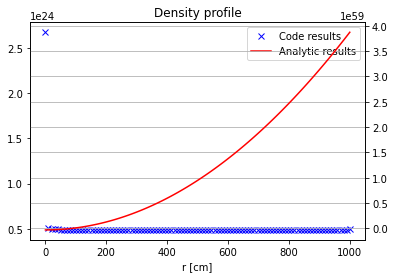

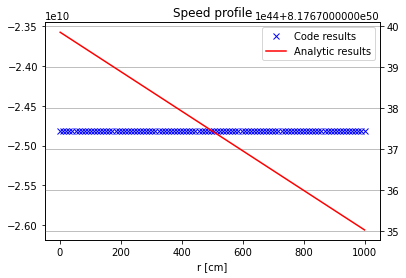

In [140]:
#rho_theo[2] = rho_theo[0] * (1 - dt**2 * (cs**2*(3-r**2/sigma**2) + 4*pi*G*(r/sigma**2 - 2/r)))
rho_theo[2] = 1 + 12 * pi * G * dt**2
plot("density",r,rho[2], rho_theo[2])

#v_theo[2] = v_theo[1] * (2 - cs**2 * dt)
v_theo[2] = (-8 * pi * G * dt -32 * pi**2 * G**2 * dt**3) * r 
plot("speed",r,v[2],v_theo[2])

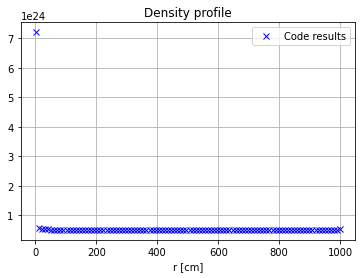

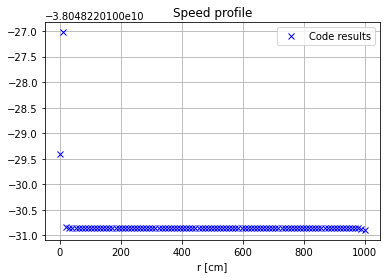

In [141]:
plot("density",r,rho[3])
plot("speed",r,v[3])

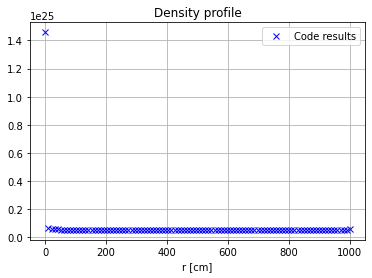

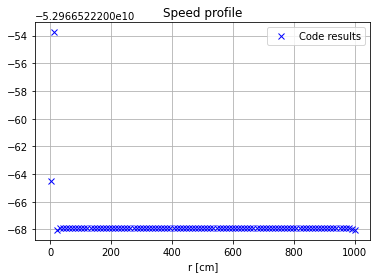

In [142]:
plot("density",r,rho[4])
plot("speed",r,v[4])